In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.spatial import distance_matrix

In [191]:
def f(x):
    [offset,scale,tau]=x
    fit=interp1d(lensData[0],offset+scale*lowPass(lensData[0],lensData[1],tau,0))
    return np.sum((fit(new_times)-waist1_interpolate(new_times))**2)

In [192]:
minimize(f,[140,3e-3,10])

C:\Users\mbqd-\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\mbqd-\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\Users\mbqd-\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mbqd-\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


      fun: 1368412.3906780889
 hess_inv: array([[ 0.98939467, -0.0446095 ,  0.19813967],
       [-0.0446095 ,  0.00201168, -0.00893382],
       [ 0.19813967, -0.00893382,  0.04044513]])
      jac: array([-1.19983453e+05, -2.75932911e+06,  3.08859375e+02])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 74
      nit: 2
     njev: 12
   status: 2
  success: False
        x: array([140.26171253,   1.04391079,   0.61058257])

In [207]:
waists=np.load("ThermalLensing50WBeamWaistCompensated.npy")
lensData=np.loadtxt("temperatures_intensity_50W_compensated.txt").transpose()
tmin=max(lensData[0,0],waists[0,0])
tmax=min(lensData[0,-1],waists[0,-1])
tmin,tmax

(1595962209.0843306, 1595962474.8666902)

In [189]:
np.max(lensData[2])

19067.0

In [205]:
index=np.arange(len(time)-1)
intensity_diff=intensity_interpolate(time[1:])-intensity_interpolate(time[:-1])
turnONTimes=time[index[intensity_diff>100]]
t1,t2=np.meshgrid(time,turnONTimes,indexing="ij")
new_times=time#[np.min(np.abs(t1-t2),axis=-1)>1e-5]


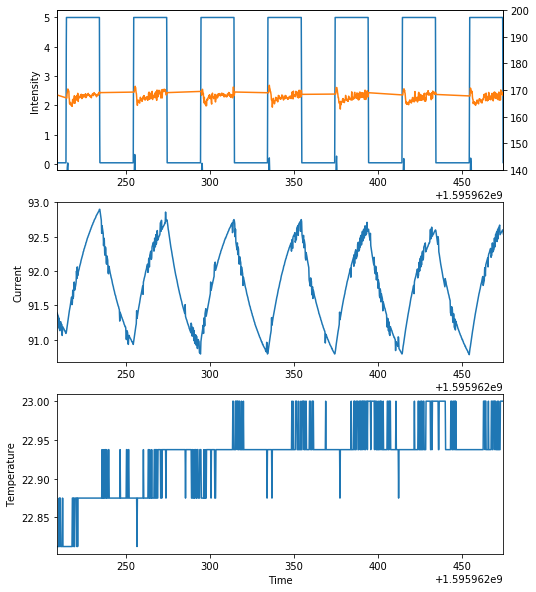

In [219]:
plt.figure(figsize=(8,10))

xmin=tmin
xmax=tmax
plt.subplot(311)
plt.xlim(xmin,xmax)
plt.ylabel("Intensity")
time=np.linspace(tmin,tmax,10000)
intensity_interpolate=interp1d(lensData[0],lensData[2])
waist1_interpolate=interp1d(waists[0],waists[3])

waist2_interpolate=interp1d(waists[0],waists[4])
plt.plot(time,intensity_interpolate(time))
ax1=plt.twinx()
time=time[intensity_interpolate(time)>1000]
#ax1.plot(time,waist2_interpolate(time),".")
ax1.plot(waists[0],waists[4])
ax1.plot(waists[0],waists[3])
ax1.set_ylim(140,200)
#plt.plot(lensData[0],150+3.e-3*lowPass(lensData[0],lensData[2],14,0))
ax1.plot(time,waist1_interpolate(time),".")
plt.subplot(312)
plt.xlim(xmin,xmax)
plt.ylabel("Current")
plt.plot(lensData[0],lensData[3])
plt.subplot(313)
plt.xlim(xmin,xmax)
plt.ylabel("Temperature")
plt.xlabel("Time")
plt.plot(lensData[0],lensData[1])
#sol=linregress(temperature_interpolate(time),waist_interpolate(time))
#T=np.array([22,27])
#plt.plot(T,sol.slope*T+sol.intercept,"r")
#plt.xlabel("Temperature [C]")
#plt.ylabel("Vertical + horizontal waist [um]")
#plt.title("waist={}+{}*T".format(sol.intercept,sol.slope))
#plt.ylim(250,450)

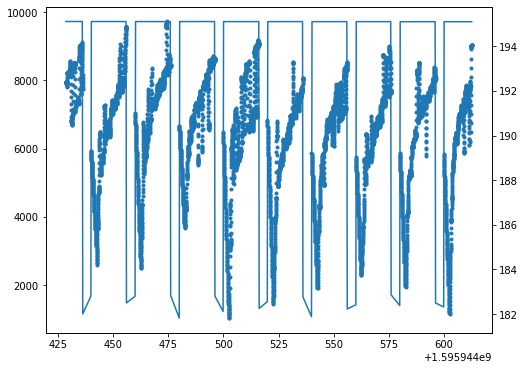

In [35]:
plt.figure(figsize=(8,6))
ax=plt.subplot()
ax.plot(time,intensity_interpolate(time))

ax1=ax.twinx()
ax1.plot(time,waist_interpolate(time),".")

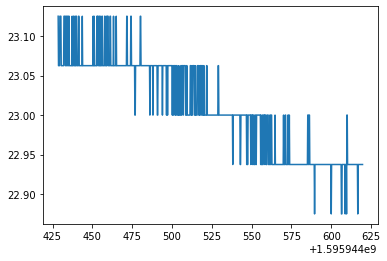

In [31]:
plt.plot(lensData[0],lensData[1])

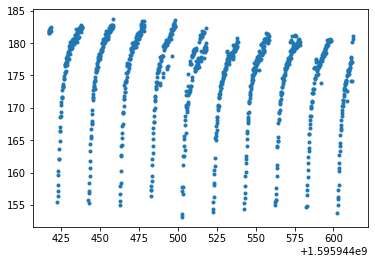

In [6]:
plt.plot(waists[0],waists[4],".")

In [85]:
def lowPass(t,e,tau,s0=0):
    s=np.full_like(e,s0)
    for i in range(1,len(e)):
        s[i]=s[i-1]+(t[i]-t[i-1])*(e[i]-s[i-1])/tau
    return s

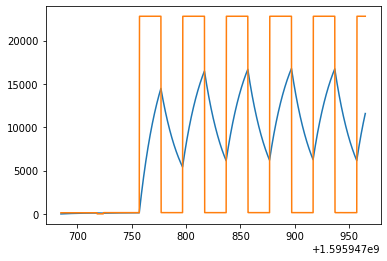

In [86]:
plt.plot(lensData[0],lowPass(lensData[0],lensData[2],20,0))
plt.plot(lensData[0],lensData[2])